# Numpy and Matplotlib code examples

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Note: np and plt are frequently used aliases for these two packages

import skimage  # for some example data


## Array creation, indexing, and dimensional attributes


In [14]:
## manual array creation

a = np.array([1,2,3,4])
a

array([1, 2, 3, 4])

In [15]:
type(a)

numpy.ndarray

In [158]:
a.dtype #dtype = "datatype", i.e. what sort of data does the array hold?

dtype('int64')

In [19]:
a.ndim, a.shape, a.size

(1, (4,), 4)

In [162]:
a[0] # 1D indexing like a list

0

In [163]:
a[:2] # slicing

array([0, 1])

In [164]:
a[-1] # reverse indexing

4

## manual array creation of a two dimensional array

In [165]:
# manual array creation of a two dimensional array
b = np.array([ [1, 2, 3],
               [4, 5, 6] ])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [166]:
b.ndim, b.shape, b.size

(2, (2, 3), 6)

### indexing of 2D array

In [167]:
b[1] # gets second row of table

array([4, 5, 6])

In [168]:
b[:,1] # second column, but not the column shape not maintained

array([2, 5])

In [169]:
b[:, 1:] # simultaneous row and column indexing

array([[2, 3],
       [5, 6]])

### 3D arrays

In [159]:
# 3 dimensional array, notice nexted brackets
c = np.array([ [[1,   2],
                [10, 20]],
               [[3,   4],
                [30, 40]],
               [[5,   6],
                [50, 60]] ])
c

array([[[ 1,  2],
        [10, 20]],

       [[ 3,  4],
        [30, 40]],

       [[ 5,  6],
        [50, 60]]])

In [160]:
c.ndim, c.shape, c.size

(3, (3, 2, 2), 12)

### Higher dimensional arrays

You can construct numpy arrays of arbitrary dimension. Here is an example of a 4D array used to represent an imaging experiment involving a Z-stack and two different flourescent markers. For more details about this data sets see: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cells3d

In [186]:
cells3d = skimage.data.cells3d()

In [187]:
cells3d.shape

(60, 2, 256, 256)

In [188]:
# get the z stack in the first channel

channel0 = cells3d[:, 0, :, :]
channel0.shape 

(60, 256, 256)

The shape of the arrays indicate there are 30 images in this z-stack (note what is considered X, Y, and Z will depend on how the array was put together or loaded, so may differ in a different context)

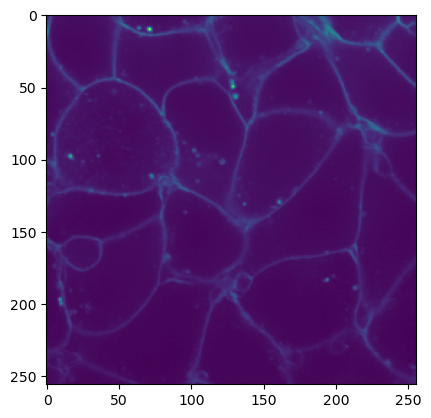

In [189]:
plt.imshow(channel0[30])  # the first channel employed a membrane specific marker

Let's take a look at the 2nd channel:

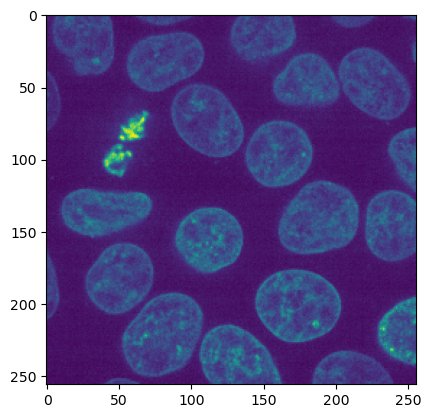

In [190]:
channel1= cells3d[:, 1, :, :]
plt.imshow(channel1[30])  
pass

The second channel used a nuclear marker.

## Numpy arrays can contain non-numeric data

In [206]:
# string array
s = np.array(["one", "two", "three", "four"])
s

array(['one', 'two', 'three', 'four'], dtype='<U5')

In [208]:
# function array
fxns = np.array([np.max, np.min, np.sum])
fxns

array([<function max at 0x104123230>, <function min at 0x1041235b0>,
       <function sum at 0x1041227b0>], dtype=object)

In [210]:
fxns[1]([2.5, 1.3, -2.8, 0])  # call np.min function

-2.8

## Numpy functions for generating arrays

In [211]:
## arange is like range() but also accepts non-integer steps
np.arange(1, 10, step=0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5])

In [212]:
## linspace is inclusive of start and stop
## you specify how many points along interval you want instead of spacing
np.linspace(1, 10, 20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [213]:
np.zeros((4,4)) # create a 4 x 4 array of zeros

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [214]:
np.ones((3,2)) # a 3 x 2 array filled with ones

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [247]:
np.diag(np.arange(1, 5))  # construct a "diagonal matrix" with given values on diagonal

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [217]:
rng = np.random.default_rng()  # get the default Random Number Generator from np.random

rng.random((3,4))  # get a 3 x 4 matrix filled with uniform random values in the interval 0 - 1

array([[0.35935218, 0.92607658, 0.59896097, 0.07753205],
       [0.15340767, 0.15931337, 0.83227716, 0.07899635],
       [0.46828391, 0.98602793, 0.12760356, 0.04008672]])

## Using reshape to create arrays of particular shapes

In [254]:
a = np.arange(1,10)
a = a.reshape((3,3))
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [232]:
# you chain methods together like this to achieve the above in a single line
a = np.arange(1,10).reshape((3,3))
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [236]:
np.arange(1,11).reshape((2,-1))  # using -1 as a value in a shape tuple let's numpy
                                 # decide the appropriate value to be compatible with the
                                 # other values provide

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [237]:
np.arange(1,11).reshape((-1,2)) 

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

## Using slicing and mutability to setup arrays

In [230]:
b = np.zeros((9,9))
b[:3,:3] = b[3:6,3:6] = b[6:,6:] = a  # initialize sub-blocks of b using a
b

array([[1., 2., 3., 0., 0., 0., 0., 0., 0.],
       [4., 5., 6., 0., 0., 0., 0., 0., 0.],
       [7., 8., 9., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 2., 3., 0., 0., 0.],
       [0., 0., 0., 4., 5., 6., 0., 0., 0.],
       [0., 0., 0., 7., 8., 9., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 2., 3.],
       [0., 0., 0., 0., 0., 0., 4., 5., 6.],
       [0., 0., 0., 0., 0., 0., 7., 8., 9.]])

## Vectorized operations

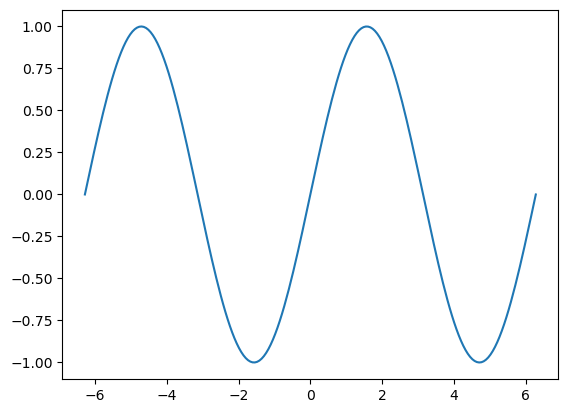

In [299]:
# numpy mathematical functions

x = np.linspace( -2 * np.pi, 2 * np.pi, 200)
y = np.sin(x)  # np.sin applies to each element in x, without need for for loop

plt.plot(x, y) 

pass

If you write a function that exploits vectorized operations/functions than your function is also vectorized.

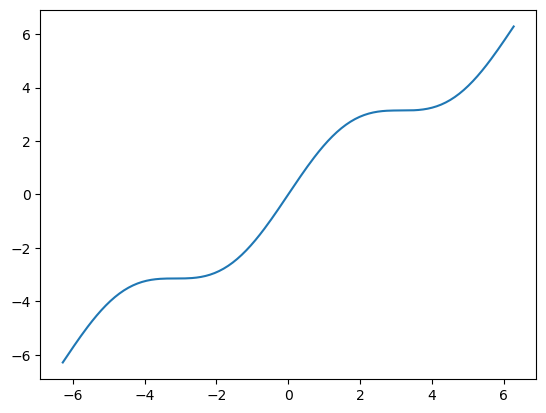

In [300]:
def sinx_plus_x(x):
    """Takes as input an interable, x, of numeric values and returns sin(x) + x."""
    # cast x to an array to insure addition operation below works element-wise
    x = np.array(x)   
    return np.sin(x) + x

plt.plot(x, sinx_plus_x(x))
pass

## Views and copies

For efficiency reasons number of operations on numpy arrays return "views" of the original array, rather than copies. If you modify a view, you also modify the original array. This can lead to unexpected behavior if you're not careful.  If you definitely want a copy rather than a view use the `.copy()` method.

In [261]:
# create a zeros matrix, and set some values to -99

z = np.zeros((5,5))
z[2,2] = -99
z[2:, 3:] = -99
z

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -99., -99., -99.],
       [  0.,   0.,   0., -99., -99.],
       [  0.,   0.,   0., -99., -99.]])

In [262]:
# create a reshaped version of z.  The reshape method returns a view (usually, see the numpy docs for details)

flatz = z.reshape(1, 25)
flatz

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., -99., -99., -99.,   0.,   0.,   0., -99., -99.,   0.,   0.,
          0., -99., -99.]])

In [265]:
# modify flatz

flatz[flatz == -99] = -88
flatz

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., -88., -88., -88.,   0.,   0.,   0., -88., -88.,   0.,   0.,
          0., -88., -88.]])

In [267]:
# check the original array z
# We find it's been modified because flatz was a view!

z

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -88., -88., -88.],
       [  0.,   0.,   0., -88., -88.],
       [  0.,   0.,   0., -88., -88.]])

In [269]:
# make flatz a copy
flatz = np.copy(flatz)
flatz[flatz == -88] = -77

flatz, z  # confirm that modification of our copy did not modify the original

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0., -77., -77., -77.,   0.,   0.,   0., -77., -77.,   0.,   0.,
           0., -77., -77.]]),
 array([[  0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.],
        [  0.,   0., -88., -88., -88.],
        [  0.,   0.,   0., -88., -88.],
        [  0.,   0.,   0., -88., -88.]]))

## Broadcasting


In [270]:
a = np.arange(10)
a + 10 # The scalar value 10 is broadcast to be compatible with a 
       # so element-wise addition works

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [272]:
# single values are appropriately broadcast no matter what the shape

a = np.arange(10).reshape((5,2))
a + 10

array([[10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [273]:
# this also works with arrays of single values

a = np.arange(10).reshape((2,5))
a + np.array([10])


array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [281]:
# For values that are non-scalar or not single value arrays, dimensions have to be
# compatible for broadcasting to work

# this works because a (2,5) and (1,5) array are compatible

a = np.arange(10).reshape((2,5))
b = np.ones((1,5)) * 10
a + b


array([[10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.]])

In [282]:
# this doesn't work -- because a (2,5) and (5,1) array are not compatible

a = np.arange(10).reshape((2,5))
b = np.ones((5,1)) * 10  
a + b

ValueError: operands could not be broadcast together with shapes (2,5) (5,1) 

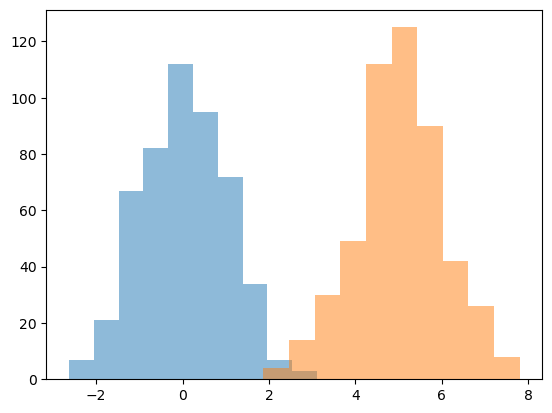

In [290]:
## Example of exploiting broadcasting in a typical analysis

# setup some synthetic data

cov = [[1, 0.5],
       [0.5, 1]]
mean = [0, 5]

rng = np.random.default_rng()
data = rng.multivariate_normal(mean = mean, cov = cov, size=500)

plt.hist(data[:,0], alpha=0.5)
plt.hist(data[:,1], alpha=0.5)
pass

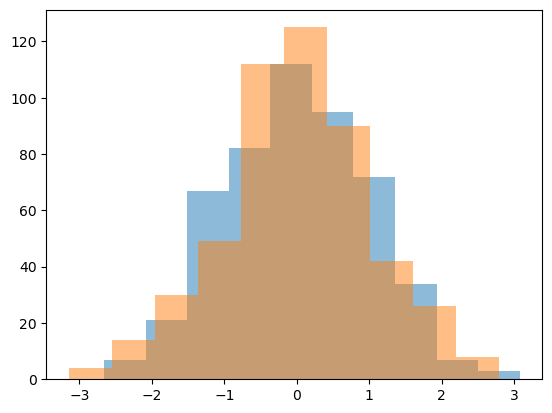

In [291]:
# mean center the data using broadcasting

ctrd_data = data - np.mean(data, axis=0)  # broadcasting exploited here to mean center each observation for each variable

plt.hist(ctrd_data[:,0], alpha=0.5)
plt.hist(ctrd_data[:,1], alpha=0.5)

pass

## Plotting

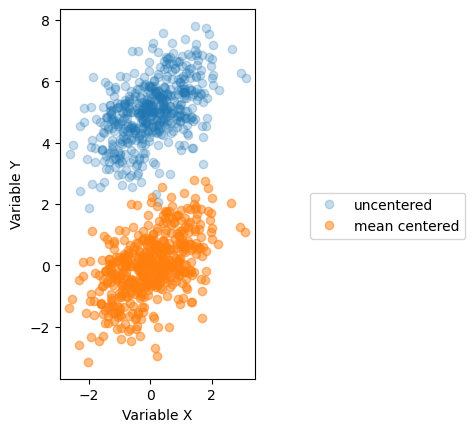

In [304]:
## line plots and marker plots with pyplot.plot

# using uncentered and centered data from above

plt.plot(data[:,0], data[:,1], 'o', alpha=0.25, label="uncentered") 
plt.plot(ctrd_data[:,0], ctrd_data[:,1], 'o', alpha=0.5, label = "mean centered")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

# plt.gcf() return the current Figure object associated with the plot we're drawing
plt.gcf().legend(loc=7)

# plt.gca() returns the current Axis object associated with the plot we're drawing
#   set_aspect() constrains aspect ratio to be equal for x- and y- axes
#   try commenting  out this line to see the difference
plt.gca().set_aspect('equal')  

pass

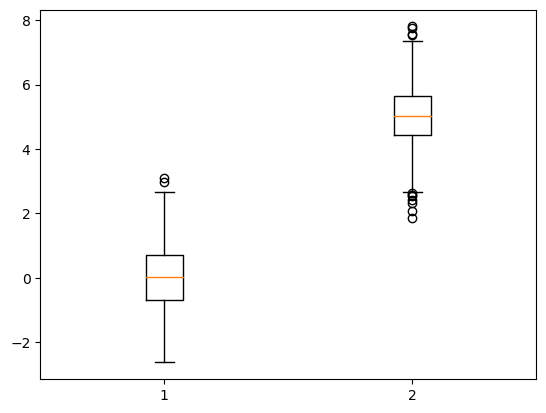

In [307]:
## boxplots
# will create a boxplot for every column in input

plt.boxplot(data)
pass

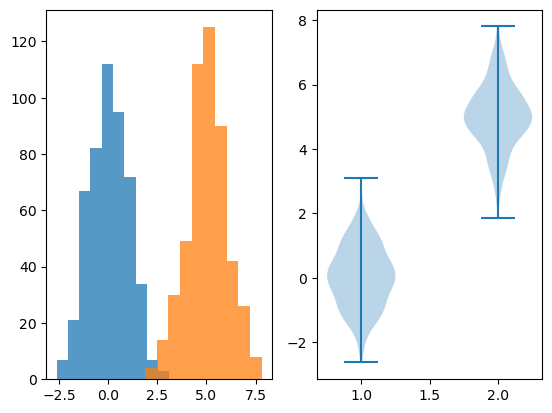

In [318]:
## subplots

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].hist(data[:,0], alpha=0.75)
axes[0].hist(data[:,1], alpha=0.75)

axes[1].violinplot(data)
pass

## Advanced plots

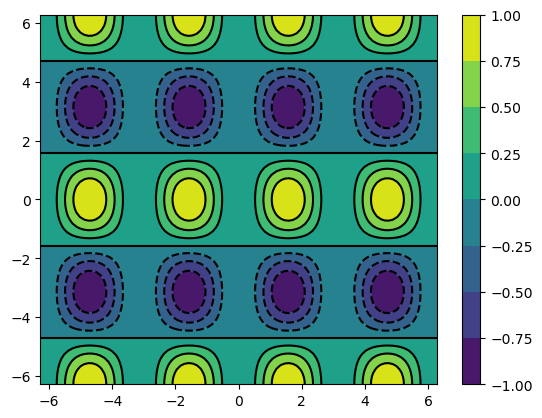

In [156]:
## Contour plots

pi = np.pi

x = np.linspace(-2*pi, 2*pi, 100)
y = np.linspace(-2*pi, 2*pi, 100)

X, Y = np.meshgrid(x,y)

Z = np.sin(X)**2 * np.cos(Y)

ctrf = plt.contourf(X, Y, Z)
ctr = plt.contour(X, Y, Z, colors=('k'))
plt.colorbar(ctrf)
pass


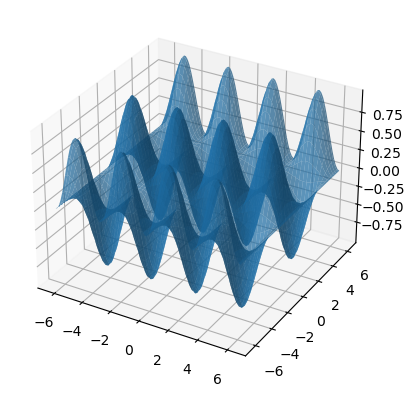

In [319]:
# 3D surface plot

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X, Y, Z, alpha=0.7)  

pass

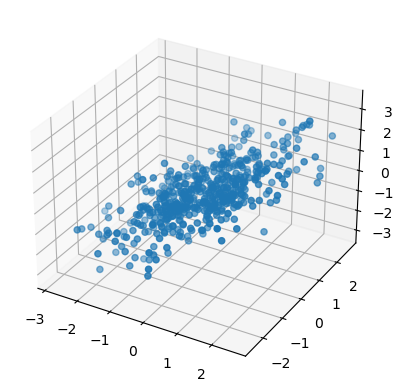

In [322]:
## 3D scatter plots

# generate a 3D dataset
cov = [[1.0, 0.5, 0.7],
       [0.5, 1.0, 0.6],
       [0.7, 0.6, 1.0]]

mean = [0, 0, 0]

rng = np.random.default_rng()
data3d = rng.multivariate_normal(mean = mean, cov = cov, size=500)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data3d[:,0], data3d[:,1], data3d[:,2])
pass